In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os
from os import listdir
from matplotlib import image
from PIL import Image
import h5py

In [73]:
categories = ['Abstract_full', 'Realism_full']

categories = os.listdir("wikiart")
def load_images(amount, folder_name, categories, size):
    images = {}
    if os.path.isfile("test.hdf5"):
        os.remove("test.hdf5")
        
    f = h5py.File("test.hdf5", "w")
    for category in categories:
        image_list = []
        file_names = []
        path = os.path.join(folder_name, category)
        for i, filename in enumerate(listdir(path)):
            if i <= amount:
                fullpath = os.path.join(path, filename)
                img_data = Image.open(fullpath)
                img_data = img_data.resize(size)
                img_data = np.asarray(img_data)
                file_names.append(filename)
                image_list.append(img_data)
            else:
                break
        
        file_names = [name.encode("ascii", "ignore") for name in file_names]
        print(file_names[0])
        category_folder = f.create_group(category)
        image_dset = category_folder.create_dataset(f'images', np.shape(image_list), dtype=h5py.h5t.STD_U8BE, data=image_list)
        label_dset = category_folder.create_dataset(f'meta', np.shape(file_names), dtype=h5py.string_dtype(), data=file_names)
        print(image_dset.name)
        print(label_dset.name)
        images[category] = image_list
        
    f.close()
    return images
        

dont_print = load_images(10, 'wikiart', categories, (128, 128))

b'paolo-veronese_moderation-1582.jpg'
/Mannerism_Late_Renaissance/images
/Mannerism_Late_Renaissance/meta
b'sam-gilliam_ibis-1987.jpg'
/Abstract_Expressionism/images
/Abstract_Expressionism/meta
b'lee-ufan_from-line-1974.jpg'
/Minimalism/images
/Minimalism/meta
b'pablo-picasso_man-with-a-guitar-1911-1.jpg'
/Analytical_Cubism/images
/Analytical_Cubism/meta
b'ogata-gekko_dragon-rising-to-the-heavens-1897.jpg'
/Ukiyo_e/images
/Ukiyo_e/meta
b'jean-hey_meeting-at-the-golden-gate.jpg'
/Northern_Renaissance/images
/Northern_Renaissance/meta
b'gustave-courbet_the-hallali-1869.jpg'
/Realism/images
/Realism/meta
b'richard-gerstl_fragment-of-a-self-portrait-1908.jpg'
/Expressionism/images
/Expressionism/meta
b'edith-vonnegut_over-the-cliff.jpg'
/Naive_Art_Primitivism/images
/Naive_Art_Primitivism/meta
b'william-james-glackens_the-shoppers-1907.jpg'
/New_Realism/images
/New_Realism/meta
b'gustave-dore_paradiso-canto-14.jpg'
/Romanticism/images
/Romanticism/meta
b'william-hogarth_surrounded-by-arti

In [84]:
f = h5py.File("test.hdf5", "r")
images = {}
for category in categories:
    image_group = np.array(f[f'/{category}/images'])
    label_group = np.array(f[f'/{category}/meta'])
    data = {label_group[i]: image_group[i] for i, _ in enumerate(image_group)}
    images[category] = data
    
f.close()

category_dict = images[categories[0]]
for k, v in category_dict.items():
    if 'vulcan' in k:
        print(f'{k}: {len(v)}')
        

paolo-veronese_vulcan-and-venus-1561.jpg: 128


In [30]:
def create_feature_matrix(image):
    rows = len(image)
    cols = len(image[0])
    feature_matrix = np.zeros((rows, cols))
    for y in range(len(image)):
        for x in range(len(image[y])):
            color_vector = image[y][x]
            feature = int((int(color_vector[0]) + int(color_vector[1]) + int(color_vector[2])) / 3)
            feature_matrix[y][x] = feature;
    
    return feature_matrix


def convert_to_one_d(matrix):
    one_d_vector = np.array([])
    for row in matrix:
        one_d_vector = np.concatenate((one_d_vector, row), axis=None)
    
    return one_d_vector
        
def show_images():            
    fig = plt.figure(figsize=(10, 10))
    r = 3
    c = 3
    for i in range(1, r * c + 1):
        fig.add_subplot(r, c, i)
        plt.imshow(images['Abstract_full'][i - 1])
    plt.show()


abstract_feature_vectors = [convert_to_one_d(create_feature_matrix(image)) for image in images['Abstract_full']]
realism_feature_vectors = [convert_to_one_d(create_feature_matrix(image)) for image in images['Realism_full']]

abstract_y = ['Abstract' for _ in enumerate(abstract_feature_vectors)]
realism_y = ['Realism' for _ in enumerate(realism_feature_vectors)]

X = [*abstract_feature_vectors, *realism_feature_vectors]
Y = [*abstract_y, *realism_y]

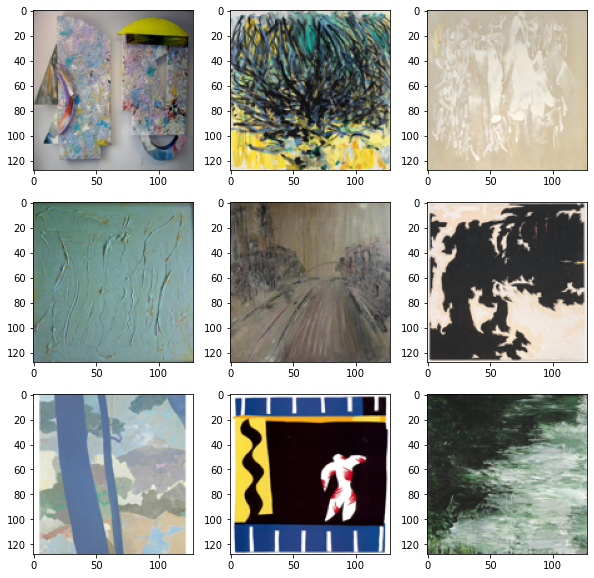

10733


In [42]:
show_images()
print(len(images['Realism_full']))

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [96]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)

In [97]:
clf_dt = clf_dt.fit(X_train, Y_train)

[Text(143.1733094262295, 211.4, 'X[26998] <= 75.5\ngini = 0.5\nsamples = 751\nvalue = [378, 373]\nclass = Abstract'),
 Text(54.885245901639344, 199.32, 'X[23930] <= 125.0\ngini = 0.364\nsamples = 226\nvalue = [54, 172]\nclass = Realism'),
 Text(43.90819672131148, 187.24, 'X[12198] <= 224.0\ngini = 0.308\nsamples = 210\nvalue = [40, 170]\nclass = Realism'),
 Text(38.41967213114754, 175.16, 'X[31885] <= 175.0\ngini = 0.278\nsamples = 204\nvalue = [34, 170]\nclass = Realism'),
 Text(27.442622950819672, 163.07999999999998, 'X[9208] <= 227.5\ngini = 0.232\nsamples = 194\nvalue = [26, 168]\nclass = Realism'),
 Text(21.95409836065574, 151.0, 'X[23580] <= 11.5\ngini = 0.198\nsamples = 189\nvalue = [21, 168]\nclass = Realism'),
 Text(10.97704918032787, 138.92000000000002, 'X[2848] <= 138.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Abstract'),
 Text(5.488524590163935, 126.84, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Abstract'),
 Text(16.465573770491805, 126.84, 'gini = 0.0\nsam

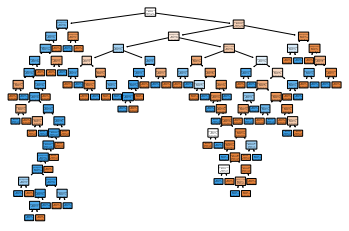

In [98]:
plot_tree(clf_dt, filled=True, rounded=True, class_names=['Abstract', 'Realism'])

1.0
0.6414342629482072


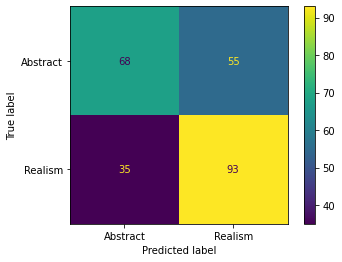

In [99]:
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=['Abstract', 'Realism'])
print(clf_dt.score(X_train, Y_train))
print(clf_dt.score(X_test, Y_test))

In [100]:
print(f'Abstract: {(68/(68+55))*100}%')
print(f'Realism: {(93/(93+35))*100}%')

Abstract: 55.28455284552846%
Realism: 72.65625%


In [101]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00130778 0.00130899 0.00177541 0.00199734 0.00199734
 0.00213049 0.00213049 0.00221926 0.00221926 0.00221926 0.00247289
 0.00250646 0.00252379 0.00255198 0.00257989 0.00320651 0.00360176
 0.00374501 0.00426099 0.00460924 0.00466045 0.00490169 0.0049826
 0.0050427  0.00509971 0.00557337 0.00599201 0.00650716 0.00655918
 0.0065906  0.0069352  0.00724035 0.00791311 0.00798935 0.00887705
 0.00940902 0.00993882 0.01009687 0.01024979 0.01100598 0.0118959
 0.01297982 0.01472115 0.01554045 0.01570208 0.01852564 0.01855231
 0.02053661 0.02449239 0.06018274]


In [102]:
clf_dts = []
for i, ccp_alpha in enumerate(ccp_alphas):
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    print(f'{(i / len(ccp_alphas))*100}% fitted')
    clf_dts.append(clf_dt)

train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

0.0% fitted
1.9607843137254901% fitted
3.9215686274509802% fitted
5.88235294117647% fitted
7.8431372549019605% fitted
9.803921568627452% fitted
11.76470588235294% fitted
13.725490196078432% fitted
15.686274509803921% fitted
17.647058823529413% fitted
19.607843137254903% fitted
21.568627450980394% fitted
23.52941176470588% fitted
25.49019607843137% fitted
27.450980392156865% fitted
29.411764705882355% fitted
31.372549019607842% fitted
33.33333333333333% fitted
35.294117647058826% fitted
37.254901960784316% fitted
39.21568627450981% fitted
41.17647058823529% fitted
43.13725490196079% fitted
45.09803921568628% fitted
47.05882352941176% fitted
49.01960784313725% fitted
50.98039215686274% fitted
52.94117647058824% fitted
54.90196078431373% fitted
56.86274509803921% fitted
58.82352941176471% fitted
60.78431372549019% fitted
62.745098039215684% fitted
64.70588235294117% fitted
66.66666666666666% fitted
68.62745098039215% fitted
70.58823529411765% fitted
72.54901960784314% fitted
74.5098039215

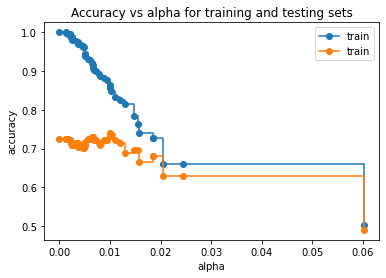

In [103]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='train', drawstyle='steps-post')
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

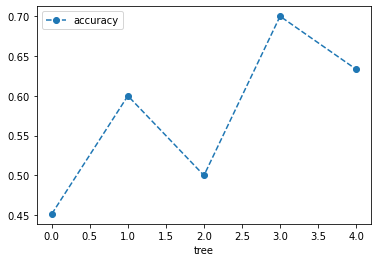

In [91]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02053661)
scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [104]:
alpha_loop_scores = []
for i, ccp_alpha in enumerate(ccp_alphas):
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
    alpha_loop_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])
    print(f'{(i / len(ccp_alphas))*100}% done')
    

0.0% done
1.9607843137254901% done
3.9215686274509802% done
5.88235294117647% done
7.8431372549019605% done
9.803921568627452% done
11.76470588235294% done
13.725490196078432% done
15.686274509803921% done
17.647058823529413% done
19.607843137254903% done
21.568627450980394% done
23.52941176470588% done
25.49019607843137% done
27.450980392156865% done
29.411764705882355% done
31.372549019607842% done
33.33333333333333% done
35.294117647058826% done
37.254901960784316% done
39.21568627450981% done
41.17647058823529% done
43.13725490196079% done
45.09803921568628% done
47.05882352941176% done
49.01960784313725% done
50.98039215686274% done
52.94117647058824% done
54.90196078431373% done
56.86274509803921% done
58.82352941176471% done
60.78431372549019% done
62.745098039215684% done
64.70588235294117% done
66.66666666666666% done
68.62745098039215% done
70.58823529411765% done
72.54901960784314% done
74.50980392156863% done
76.47058823529412% done
78.43137254901961% done
80.3921568627451%

<AxesSubplot:xlabel='alpha'>

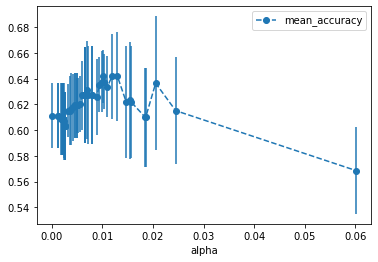

In [106]:
alpha_results = pd.DataFrame(alpha_loop_scores, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [109]:
alpha_results[(alpha_results['alpha'] > 0.01) & (alpha_results['alpha'] < 0.03)]

,alpha,mean_accuracy,std
38,0.010097,0.641854,0.020840
39,0.010250,0.637854,0.021443
40,0.011006,0.633863,0.023505
41,0.011896,0.641863,0.033200
42,0.012980,0.641863,0.034769
43,0.014721,0.621863,0.043449
44,0.015540,0.623196,0.045277
45,0.015702,0.621863,0.043449
46,0.018526,0.609863,0.038438
47,0.018552,0.609863,0.038438


In [127]:
max_index = alpha_results['mean_accuracy'].idxmax()
max_alpha = alpha_results.loc[42]['alpha']
max_alpha = float(max_alpha)
max_alpha

0.012979818789267433

In [130]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=max_alpha, criterion='gini')
clf_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.012979818789267433, random_state=42)

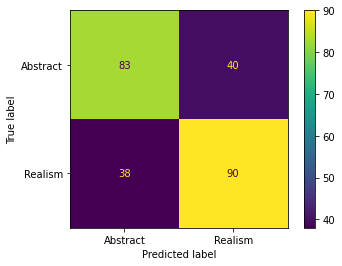

In [131]:
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=['Abstract', 'Realism'])

In [133]:
print(len(X_test))
print(len(X_train))

251
751


In [134]:
print(f'Abstract: {(83/(83+40))*100}%')
print(f'Realism: {(90/(90+38))*100}%')

Abstract: 67.47967479674797%
Realism: 70.3125%


[Text(304.3636363636364, 378.5785714285714, 'X[26998] <= 75.5\ngini = 0.5\nsamples = 751\nvalue = [378, 373]\nclass = Abstract'),
 Text(152.1818181818182, 320.3357142857143, 'X[23930] <= 125.0\ngini = 0.364\nsamples = 226\nvalue = [54, 172]\nclass = Realism'),
 Text(76.0909090909091, 262.09285714285716, 'gini = 0.308\nsamples = 210\nvalue = [40, 170]\nclass = Realism'),
 Text(228.27272727272728, 262.09285714285716, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = Abstract'),
 Text(456.54545454545456, 320.3357142857143, 'X[19077] <= 222.5\ngini = 0.473\nsamples = 525\nvalue = [324, 201]\nclass = Abstract'),
 Text(380.4545454545455, 262.09285714285716, 'X[23637] <= 78.5\ngini = 0.494\nsamples = 425\nvalue = [235, 190]\nclass = Abstract'),
 Text(228.27272727272728, 203.85, 'X[1727] <= 100.5\ngini = 0.456\nsamples = 131\nvalue = [46, 85]\nclass = Realism'),
 Text(152.1818181818182, 145.60714285714283, 'X[113] <= 63.5\ngini = 0.477\nsamples = 51\nvalue = [31, 20]\nclass = Abstract'),
 

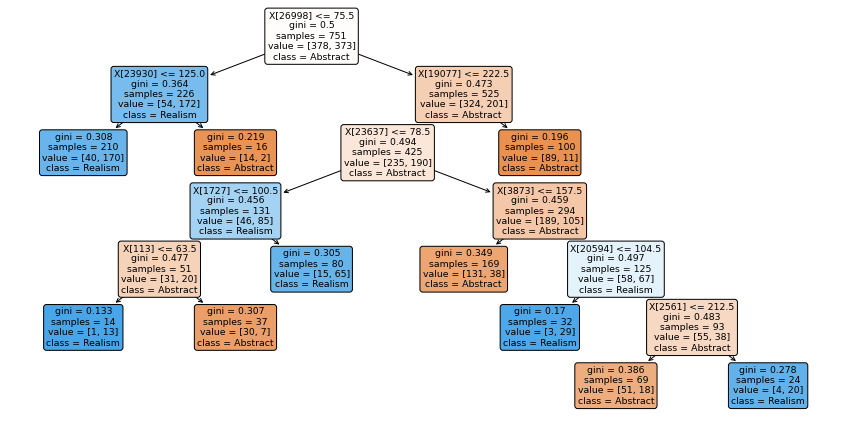

In [135]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['Abstract', 'Realism'])

In [8]:
images = load_images(2000, 'Data', ['Abstract_full', 'Realism_full'], (180, 180))

In [9]:
abstract_feature_vectors = [convert_to_one_d(create_feature_matrix(image)) for image in images['Abstract_full']]

NameError: name 'convert_to_one_d' is not defined

In [ ]:
print(abstract_feature_vectors[0])

In [ ]:
print(len(abstract_feature_vectors[0]))
start = 1200
samples = 400
prediction = clf_dt.predict(abstract_feature_vectors[start:start+samples])

In [ ]:
len([a for a in prediction if a == 'Abstract']) / samples